#         CoronHack-Respiratory Sound - EDA - Part 1


### Objective 

Corona - COVID19 virus affects the respiratory system of healthy individual & Respiratory Sound is one of the important testing methods to identify the corona virus.


### Dataset Description
With the Respiratory Sound dataset, Develop a Machine Learning Model to classify the Respiratory Sound of Healthy vs Corona affected patients & this model powers the AI application to test the Corona Virus in Faster Phase.

Content
Respiratory Sound files of Corona affected users and Users does not have corona is available in CoronaHack-Respiratory-Sound-Dataset

Respiratory sound files available in train and test folders with dates and user ID

Multiple category of respiratory sound files

* breathing-deep
* breathing-shallow
* cough-heavy
* cough-shallow
* counting-fast
* counting-normal
* vowel-a
* vowel-e
* vowel-o

Respiratory Sound files for each users available in data folders and labels , demographic details and other ailments related to User available in Corona-Hack-Respiratory-Sound-Metadata.csv file

#### Target variable -

COVIDteststatus - ( Possible values 1 - User Has COVID , 0 -User does not have COVID & NA - User does't provided COVID status )

#### Features :-

User Personal ID

USER_ID - User ID is encrypted actual customer is not stored
GENDER - M - Male & F - For Female
AGE. - Integer
COVIDSTATUS - ( Possible values - healthy , respillnessnotidentified,ect )
ENGLISH_PROFICIENCY - Y - Yes or N - No
User Demographic details :-

COUNTRY
COUNTYROSTATE
CITY_LOCALITY
Data collection dates -

DATES - Date format YYYYMMDD
User Health ailments and Corona Symptoms ( Possible values - 1 True & 0- False )

* Diabetes
* Asthma
* Smoker
* Hypertension
* Fever
* Returning_User
* Using_Mask
* Cold
* Caugh
* Muscle_Pain
* lossofsmell
* Sore_Throat
* Fatigue
* Breathing_Difficulties
* ChronicLungDisease
* IschemicHeartDisease
* Pneumonia
* Diarrheoa


Respiratory Sound file category paths ( Below files contain the path with file name & if the .Wav file not available value will be blank )

* breathing-deep
* breathing-shallow
* cough-heavy
* cough-shallow
* counting-fast
* counting-normal
* vowel-a
* vowel-e
* vowel-o

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering Libraries

from sklearn.preprocessing import OneHotEncoder

# Data Visualisation libraries 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

## Sound Analysis Library 

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import glob
import soundfile
from scipy.io.wavfile import read


from pydub import AudioSegment
import IPython

# Data Processing

In [3]:
PATH = '/kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset/'

In [4]:
df = pd.read_csv(PATH+'Corona-Hack-Respiratory-Sound-Metadata.csv')

In [5]:
def lbl_fun_cat(path):
    if 'train' in path:
        res = 'train'
    else:
        res = 'test'
    return res

In [6]:
df['breathing-deep'] = df['breathing-deep'].astype('str')
df['dataset_catagory'] = np.vectorize(lbl_fun_cat)(df['breathing-deep'])

In [7]:
df.columns

Index(['USER_ID', 'COUNTRY', 'AGE', 'COVID_STATUS', 'ENGLISH_PROFICIENCY',
       'GENDER', 'COUNTY_RO_STATE', 'CITY_LOCALITY', 'Diabetes', 'Asthma',
       'Smoker', 'Hypertension', 'Fever', 'Returning_User', 'Using_Mask',
       'Cold', 'Caugh', 'Muscle_Pain', 'loss_of_smell', 'Sore_Throat',
       'Fatigue', 'Breathing_Difficulties', 'Chronic_Lung_Disease',
       'Ischemic_Heart_Disease', 'Pneumonia', 'COVID_test_status', 'Diarrheoa',
       'DATES', 'breathing-deep', 'breathing-shallow', 'cough-heavy',
       'cough-shallow', 'counting-fast', 'counting-normal', 'vowel-a',
       'vowel-e', 'vowel-o', 'dataset_catagory'],
      dtype='object')

In [8]:
df.groupby(['dataset_catagory','COVID_test_status']).agg({'USER_ID':'count'}).rename(columns={'USER_ID':'User Count'})

User Count
dataset_catagory COVID_test_status            
test             0.0                       223
                 1.0                         5
train            0.0                      1118
                 1.0                         9

In [9]:
df.groupby(['dataset_catagory','COVID_test_status','COVID_STATUS']).agg({'USER_ID':'count'}).rename(columns={'USER_ID':'User Count'})

User Count
dataset_catagory COVID_test_status COVID_STATUS                           
test             0.0               healthy                             146
                                   no_resp_illness_exposed              25
                                   positive_asymp                        8
                                   positive_mild                        25
                                   positive_moderate                     2
                                   recovered_full                        8
                                   resp_illness_not_identified           9
                 1.0               positive_asymp                        1
                                   positive_mild                         3
                                   positive_moderate                     1
train            0.0               healthy                             981
                                   no_resp_illness_exposed              59
                                   positive_mild                         5
                                   positive_moderate                     2
                                   recovered_full                        2
                                   resp_illness_not_identified          68
                                   �                                     1
                 1.0               positive_asymp                        2
                                   positive_mild                         5
                                   positive_moderate                     2

## Let See How the users distributed by Country

In [10]:
df.groupby(['dataset_catagory','COUNTRY']).agg({'USER_ID':'count'}).rename(columns={'USER_ID':'User Count'})

User Count
dataset_catagory COUNTRY                         
test             Bangladesh                     1
                 China                          2
                 Ecuador                        1
                 France                         5
                 Germany                        1
                 India                        217
                 Italy                          1
                 Japan                          1
                 Korea South                    1
                 Romania                        2
                 Saudi Arabia                   1
                 United States                  8
train            Argentina                      1
                 Australia                      2
                 Bahrain                        1
                 Belgium                        1
                 Canada                        13
                 China                          1
                 Finland                        3
                 France                         7
                 Germany                        6
                 India                       1037
                 Iran                           1
                 Iraq                           1
                 Ireland                        1
                 Japan                          2
                 Malaysia                       1
                 Netherlands The                6
                 Norway                         1
                 Oman                           2
                 Philippines                    1
                 Qatar                          1
                 Romania                        1
                 Saudi Arabia                   2
                 Singapore                      3
                 Sri Lanka                      1
                 Sweden                         1
                 Switzerland                    2
                 Syria                          1
                 Ukraine                        1
                 United Arab Emirates           3
                 United Kingdom                 4
                 United States                 48

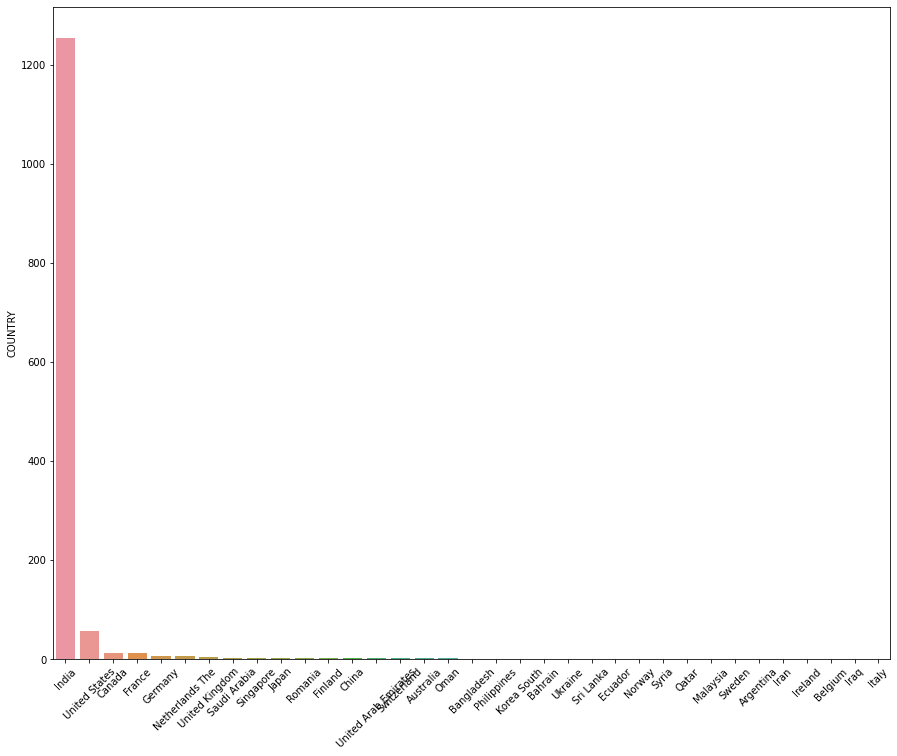

In [11]:
plt.figure(figsize=(15,12))
labels = sns.barplot(df.COUNTRY.value_counts().index,df.COUNTRY.value_counts())
for item in labels.get_xticklabels():
    item.set_rotation(45)

#### Observation - 

No of users in India is High compared to other countries

# Target label distribution

In [12]:
source = df['COVID_test_status'].value_counts()

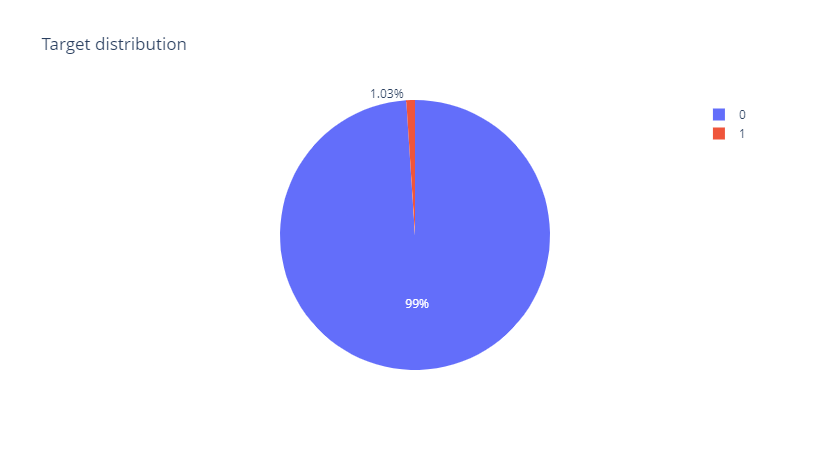

In [13]:
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Target distribution')
fig.show()

#### Observation - 

Dataset is highly unblanaced , Covid Infected patient is around 1% in the overall dataset

# Health ailment relationship between COVID and Non COVID Users

How the COVID_test_status is related with below health ailments

* Diabetes
* Asthma
* Smoker 
* Hypertension
* Fever

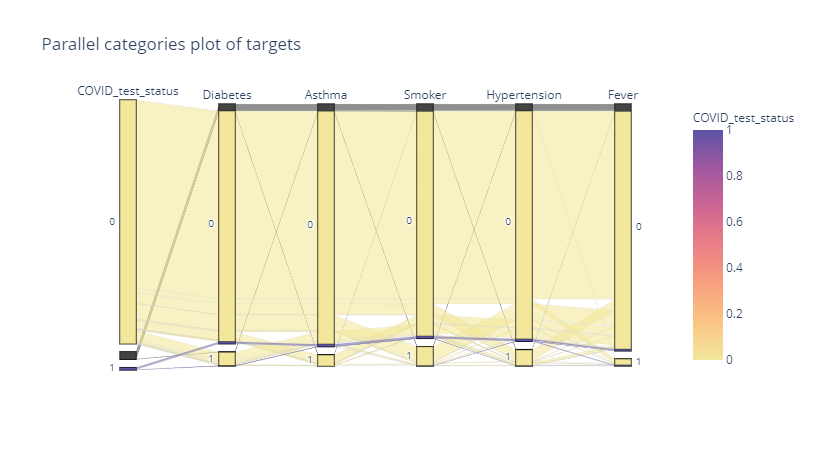

<Figure size 3240x1440 with 0 Axes>

In [14]:
plt.figure(figsize=(45,20))
fig = px.parallel_categories(df[['COVID_test_status','Diabetes', 'Asthma',
       'Smoker', 'Hypertension', 'Fever', ]], color="COVID_test_status", color_continuous_scale="sunset",\
                             title="Parallel categories plot of targets")
fig

How the COVID_test_status is related with below health ailments

* Returning_User
* Using_Mask
* Cold
* Caugh
* Muscle_Pain

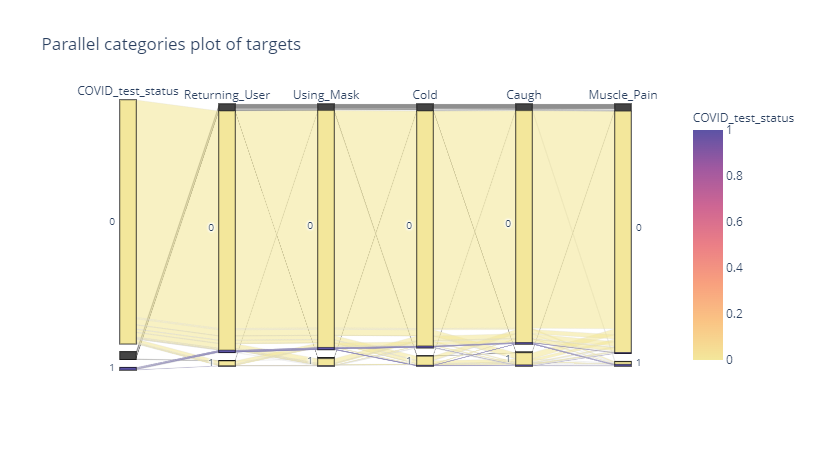

<Figure size 3240x1440 with 0 Axes>

In [15]:
plt.figure(figsize=(45,20))
fig = px.parallel_categories(df[['COVID_test_status','Returning_User', 'Using_Mask',
       'Cold', 'Caugh', 'Muscle_Pain' ]], color="COVID_test_status", color_continuous_scale="sunset",\
                             title="Parallel categories plot of targets")
fig

How the COVID_test_status is related with below health ailments

* loss_of_smell
* Sore_Throat
* Fatigue
* Breathing_Difficulties
* Chronic_Lung_Disease
* Ischemic_Heart_Disease
* Pneumonia
* Diarrheoa

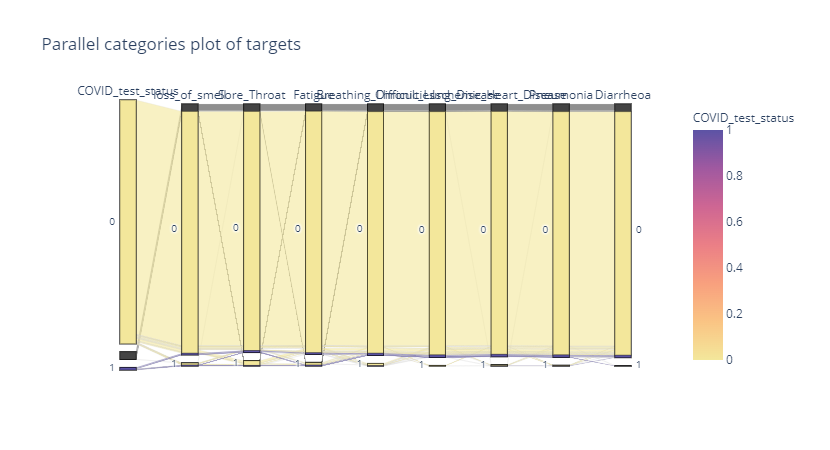

<Figure size 3240x1440 with 0 Axes>

In [16]:
plt.figure(figsize=(45,20))
fig = px.parallel_categories(df[['COVID_test_status','loss_of_smell', 'Sore_Throat',
       'Fatigue', 'Breathing_Difficulties', 'Chronic_Lung_Disease',
       'Ischemic_Heart_Disease', 'Pneumonia', 'Diarrheoa' ]], color="COVID_test_status", color_continuous_scale="sunset",\
                             title="Parallel categories plot of targets")
fig

#### Observation :- 

As per above Catagory plots , Users tested Positive for Covid has almost all health related ailments described above

In [17]:
hlth_ail = {
    'USER_ID':'count','Diabetes':'sum', 'Asthma':'sum',
       'Smoker':'sum', 'Hypertension':'sum', 'Fever':'sum', 'Returning_User':'sum', 'Using_Mask':'sum',
       'Cold':'sum', 'Caugh':'sum', 'Muscle_Pain':'sum', 'loss_of_smell':'sum', 'Sore_Throat':'sum',
       'Fatigue':'sum', 'Breathing_Difficulties':'sum', 'Chronic_Lung_Disease':'sum',
       'Ischemic_Heart_Disease':'sum', 'Pneumonia':'sum', 'Diarrheoa':'sum'
}

In [18]:
df_ailment = df.groupby(['COVID_test_status']).agg(hlth_ail).rename(columns={'USER_ID':'USER_Count'}).reset_index()
df_ailment = df_ailment.T
df_ailment.columns = [ 'Covid-Status-'+str(c) for c in df_ailment.columns]

In [19]:
df_ailment = df_ailment.reset_index().rename(columns={'index':'Health_ailments'})

In [20]:
df_ailment['User_cnt_without_COVID'] = df_ailment[df_ailment['Health_ailments']=='USER_Count']['Covid-Status-0'].values[0]
df_ailment['User_cnt_with_COVID'] = df_ailment[df_ailment['Health_ailments']=='USER_Count']['Covid-Status-1'].values[0]

In [21]:
df_ailment = df_ailment[~((df_ailment['Health_ailments']=='COVID_test_status') | (df_ailment['Health_ailments']=='USER_Count'))]

In [22]:
df_ailment['Health_ailment_PCT_Non_COVID'] = round((df_ailment['Covid-Status-0']/df_ailment['User_cnt_without_COVID'])*100,2)
df_ailment['Health_ailment_PCT_COVID'] = round((df_ailment['Covid-Status-1']/df_ailment['User_cnt_with_COVID'])*100,2)

In [23]:
df_ailment['Health_ailment_PCT_COVID']

2     14.29
3      0.00
4      7.14
5      7.14
6     35.71
7      7.14
8     14.29
9     28.57
10    42.86
11    64.29
12    35.71
13    21.43
14    35.71
15    14.29
16     0.00
17     7.14
18     7.14
19     7.14
Name: Health_ailment_PCT_COVID, dtype: float64

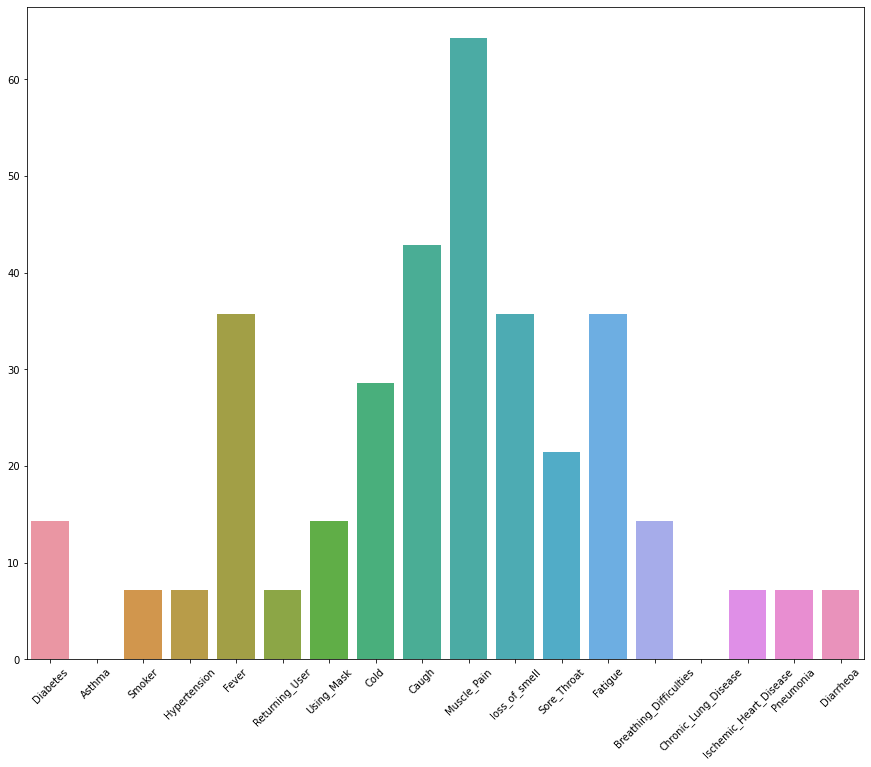

In [24]:
plt.figure(figsize=(15,12))
labels = sns.barplot(df_ailment['Health_ailments'].values,df_ailment['Health_ailment_PCT_COVID'].values)
for item in labels.get_xticklabels():
    item.set_rotation(45)

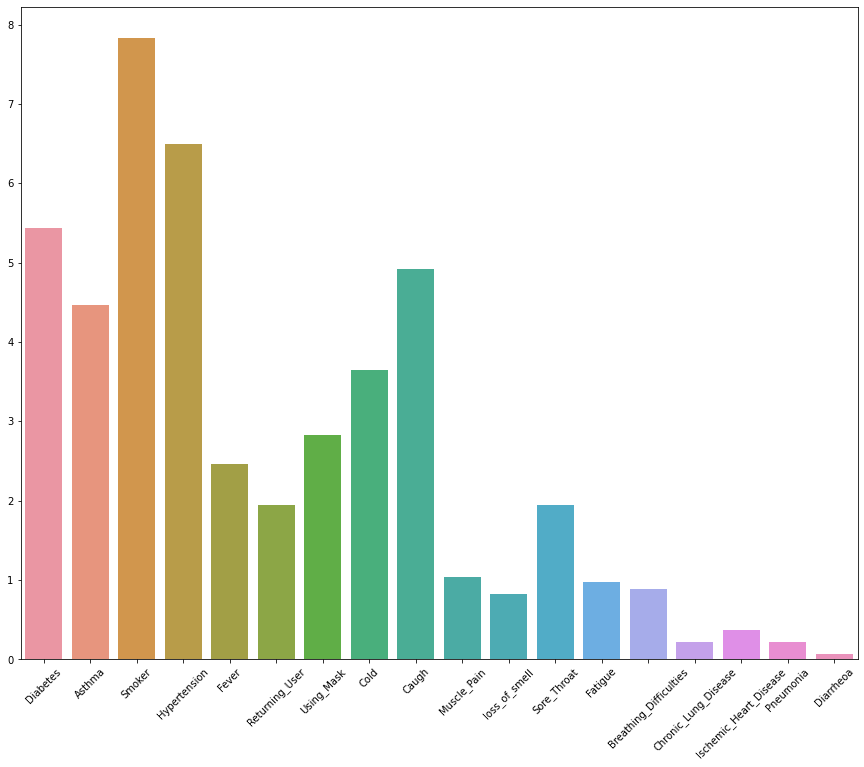

In [25]:
plt.figure(figsize=(15,12))
labels = sns.barplot(df_ailment['Health_ailments'].values,df_ailment['Health_ailment_PCT_Non_COVID'].values)
for item in labels.get_xticklabels():
    item.set_rotation(45)

In [26]:
source_health_ailment_cvd = df_ailment['Covid-Status-1'].values
source_health_ailment_non_cvd = df_ailment['Covid-Status-0'].values
source_health_ailment = df_ailment['Health_ailments'].values


In [27]:
source_health_ailment

array(['Diabetes', 'Asthma', 'Smoker', 'Hypertension', 'Fever',
       'Returning_User', 'Using_Mask', 'Cold', 'Caugh', 'Muscle_Pain',
       'loss_of_smell', 'Sore_Throat', 'Fatigue',
       'Breathing_Difficulties', 'Chronic_Lung_Disease',
       'Ischemic_Heart_Disease', 'Pneumonia', 'Diarrheoa'], dtype=object)

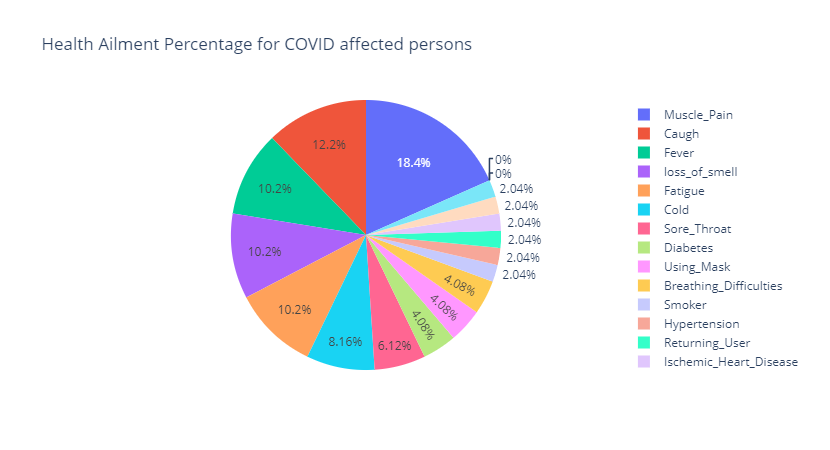

In [28]:
fig = go.Figure(data=[go.Pie(labels=df_ailment['Health_ailments'].values,values=source_health_ailment_cvd)])
fig.update_layout(title='Health Ailment Percentage for COVID affected persons')
fig.show()

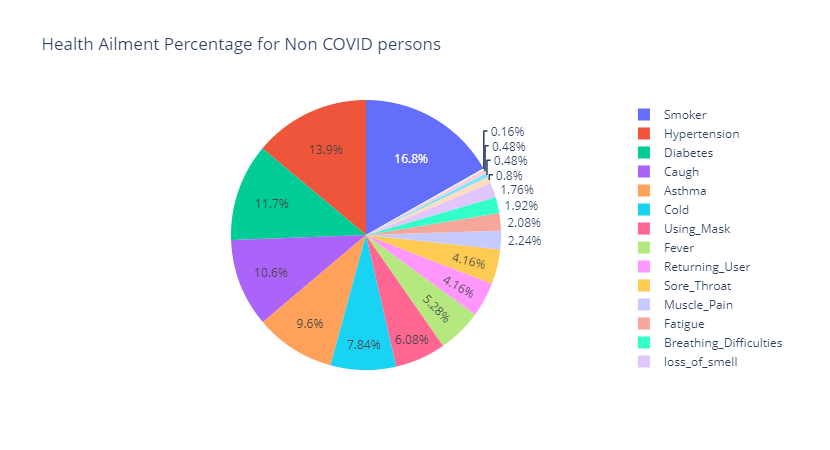

In [29]:
fig = go.Figure(data=[go.Pie(labels=df_ailment['Health_ailments'].values,values=source_health_ailment_non_cvd)])
fig.update_layout(title='Health Ailment Percentage for Non COVID persons')
fig.show()

In [30]:
PATH+df[df['COVID_test_status']==1]['breathing-deep'][653]

'/kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset//data/train/20210406/UnJVcWCaLzSZJS8B0YJmDwF9d143/breathing-deep.wav'

In [31]:
PATH+df[df['COVID_test_status']==0]['breathing-deep'][0]
PATH+df[df['COVID_test_status']==1]['breathing-deep'][653]

'/kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset//data/train/20210406/UnJVcWCaLzSZJS8B0YJmDwF9d143/breathing-deep.wav'

# Visualise recordings in spectogram

In [32]:
def get_spectogram(audio_file):
    time_series, sample_rate = librosa.load(audio_file)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(time_series, hop_length=512, n_fft=2048 * 4))
    
    # Create a spectrogram image using librosa's amplitude_to_db function
    spectrogram = librosa.amplitude_to_db(stft, ref=np.max)
    
    # Plot the power spectrum
    FIG_SIZE = (15, 10)
    fft = np.fft.fft(time_series)
    
    # Calculate absolute values on complex numbers to get magnitude
    spectrum = np.abs(fft)
    
    # Create the frequency variable
    f = np.linspace(0, sample_rate, len(spectrum))
    
    # Take half of the spectrum and frequency
    left_spectrum = spectrum[:int(len(spectrum) / 2)]
    left_f = f[:int(len(spectrum) / 2)]
    
    # Plot the power spectrum
    plt.figure(figsize=FIG_SIZE)
    plt.plot(left_f, left_spectrum, alpha=0.4)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("Power spectrum")
    plt.show()
    
    return spectrogram

In [33]:
!ls /kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset//data/train/20210406/UnJVcWCaLzSZJS8B0YJmDwF9d143/breathing-deep.wav

/kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset//data/train/20210406/UnJVcWCaLzSZJS8B0YJmDwF9d143/breathing-deep.wav


# Spectral difference between COVID User and Non COVID User for different respiratory test

* breathing-deep
* breathing-shallow
* cough-heavy
* cough-shallow
* counting-fast
* counting-normal
* vowel-a
* vowel-e
* vowel-o

In [34]:
df.columns

Index(['USER_ID', 'COUNTRY', 'AGE', 'COVID_STATUS', 'ENGLISH_PROFICIENCY',
       'GENDER', 'COUNTY_RO_STATE', 'CITY_LOCALITY', 'Diabetes', 'Asthma',
       'Smoker', 'Hypertension', 'Fever', 'Returning_User', 'Using_Mask',
       'Cold', 'Caugh', 'Muscle_Pain', 'loss_of_smell', 'Sore_Throat',
       'Fatigue', 'Breathing_Difficulties', 'Chronic_Lung_Disease',
       'Ischemic_Heart_Disease', 'Pneumonia', 'COVID_test_status', 'Diarrheoa',
       'DATES', 'breathing-deep', 'breathing-shallow', 'cough-heavy',
       'cough-shallow', 'counting-fast', 'counting-normal', 'vowel-a',
       'vowel-e', 'vowel-o', 'dataset_catagory'],
      dtype='object')

### Non COVID user - breathing-deep sound test

In [35]:

IPython.display.Audio(PATH+df[df['COVID_test_status']==0]['breathing-deep'][0])

### COVID user - breathing-deep sound test

In [36]:
IPython.display.Audio(PATH+df[df['COVID_test_status']==1]['breathing-deep'][653])

## Spectral difference for breathing-deep - Respiratory Test

In [37]:
def plot_spectral_difference(resp_test_type,tgt_0_id,tgt_1_id):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

    librosa.display.specshow(get_spectogram(PATH+df[df['COVID_test_status']==0][resp_test_type][tgt_0_id]),
                             y_axis='log', x_axis='time', ax=ax[0])
    ax[0].set(title='breathing-deep - Non COVID User')
    ax[0].label_outer()

    librosa.display.specshow(get_spectogram(PATH+df[df['COVID_test_status']==1][resp_test_type][tgt_1_id]),
                             y_axis='log', x_axis='time', ax=ax[1])

    ax[1].set(title='breathing-deep - COVID User')
    ax[1].label_outer();
    plt.suptitle('Recording for '+resp_test_type+' for COVID 19 User vs Non COVID User', fontsize=20)
    return None

In [38]:
 resp_test_list = ['breathing-deep', 'breathing-shallow', 'cough-heavy',
       'cough-shallow', 'counting-fast', 'counting-normal', 'vowel-a',
       'vowel-e', 'vowel-o']

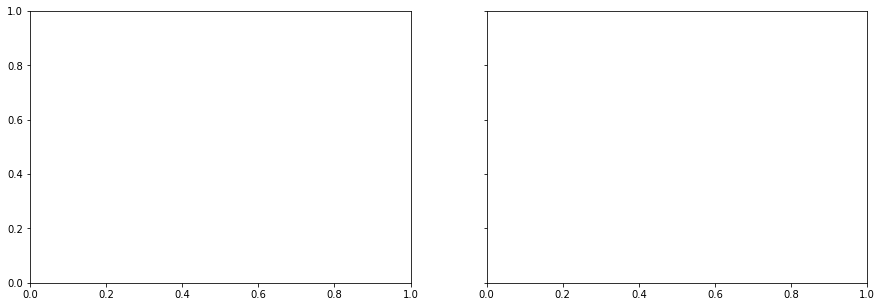

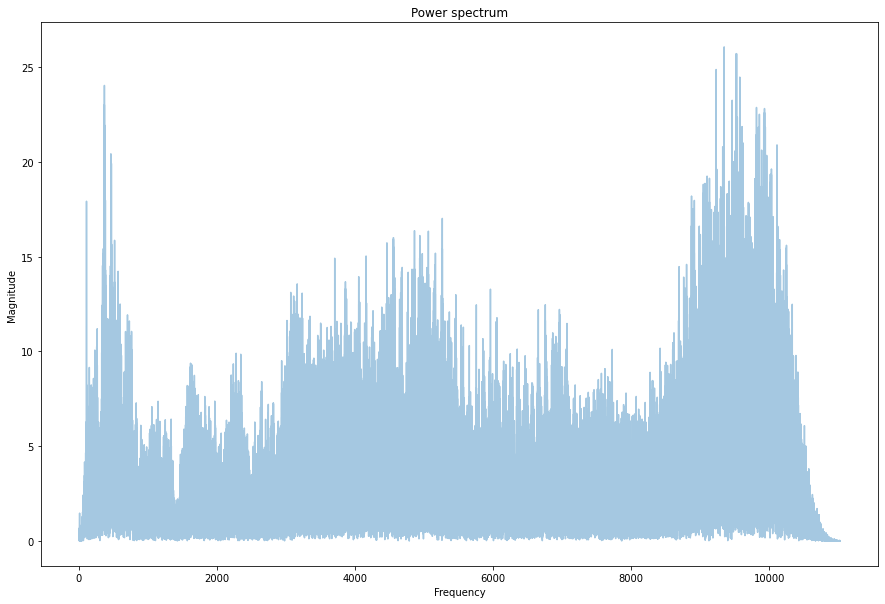

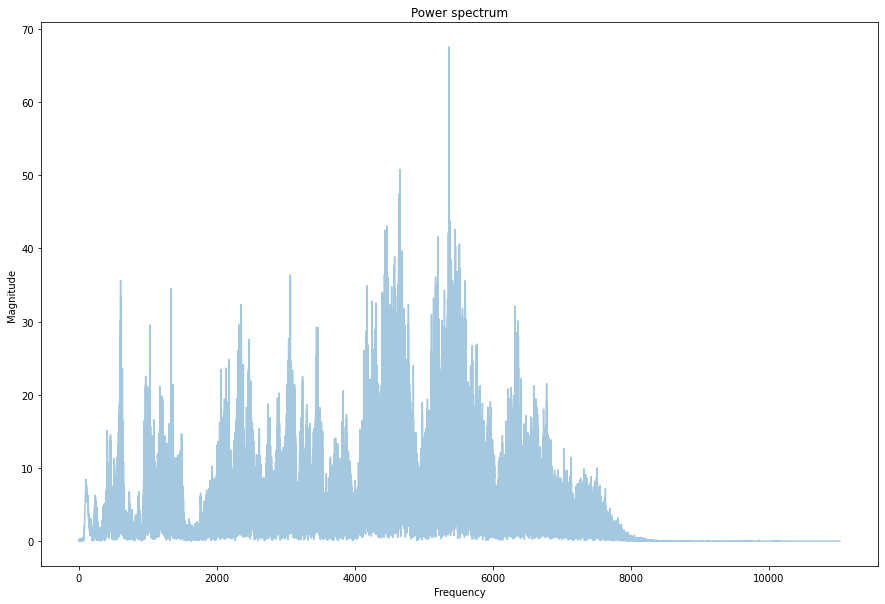

<Figure size 432x288 with 0 Axes>

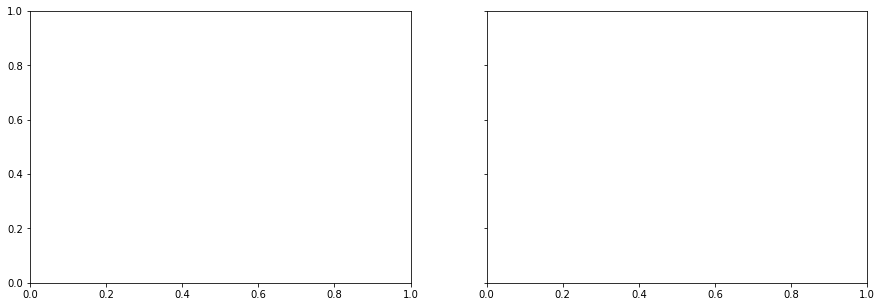

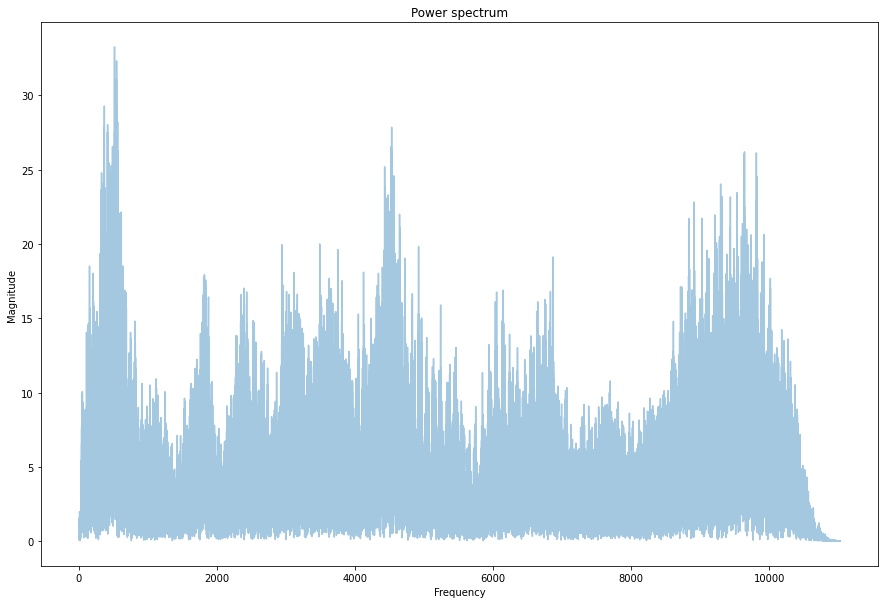

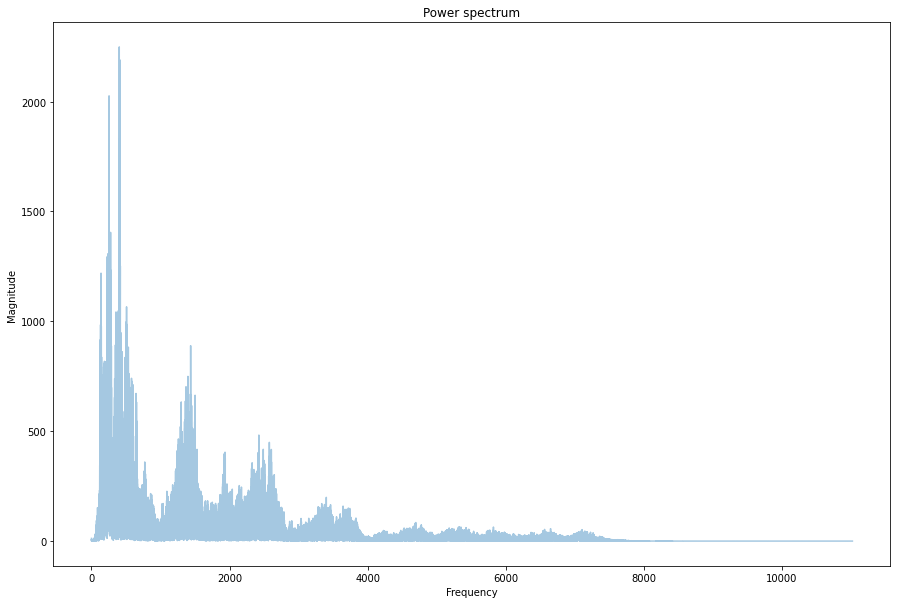

<Figure size 432x288 with 0 Axes>

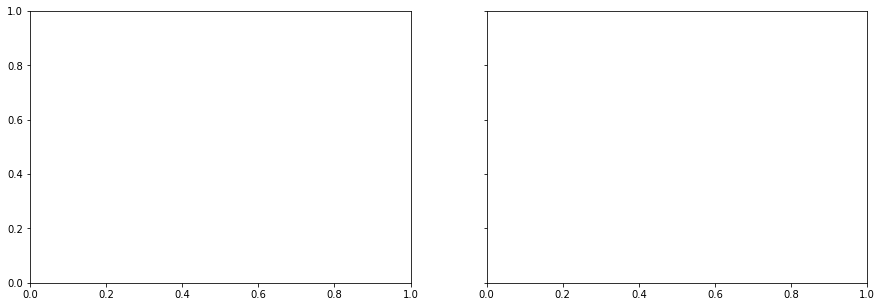

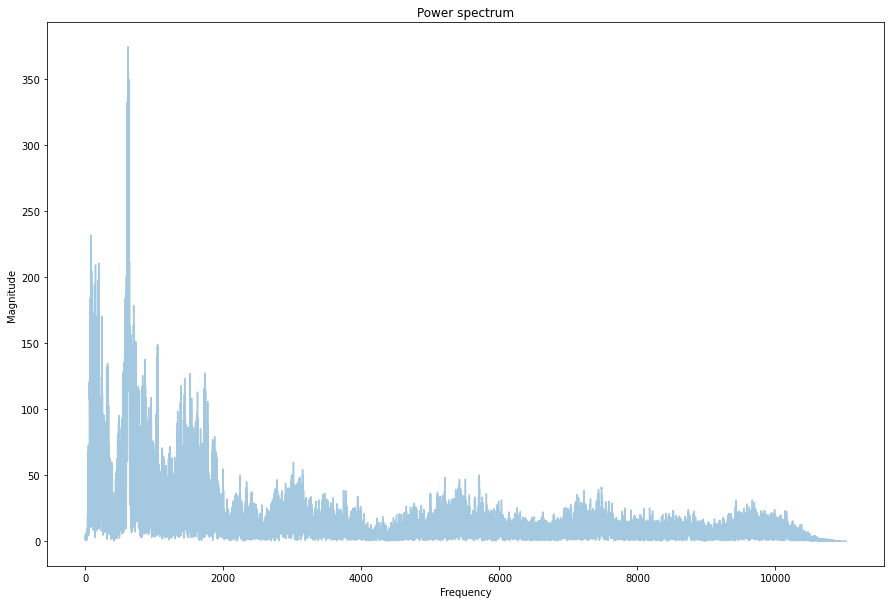

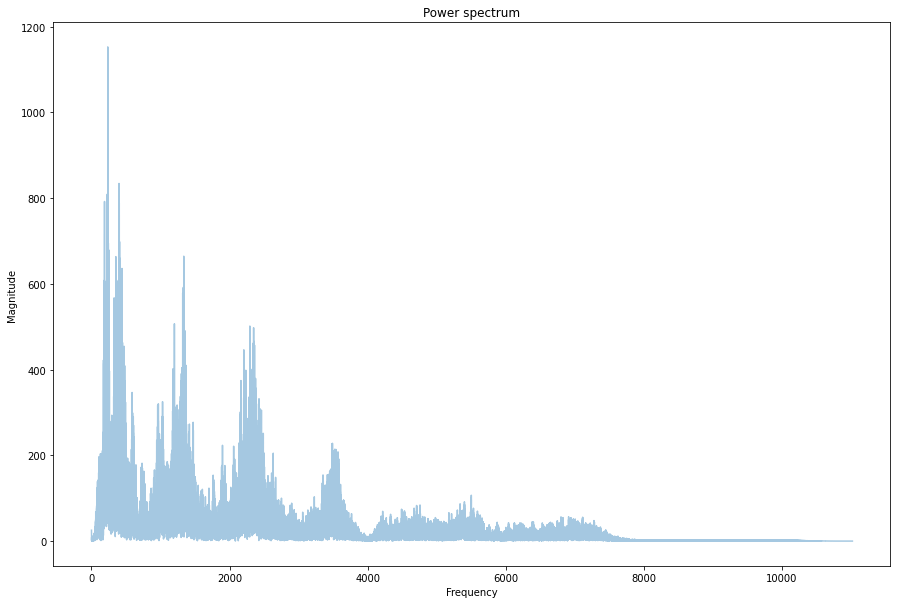

<Figure size 432x288 with 0 Axes>

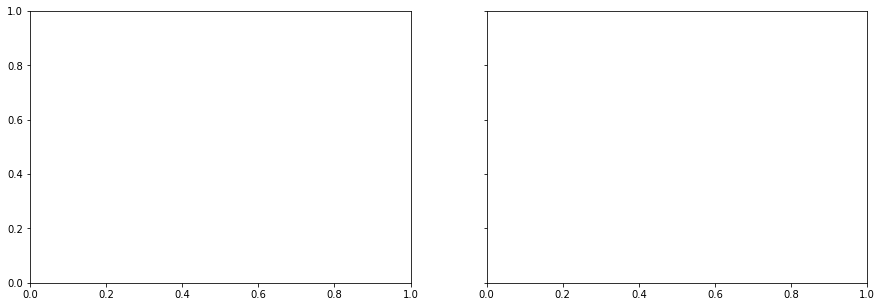

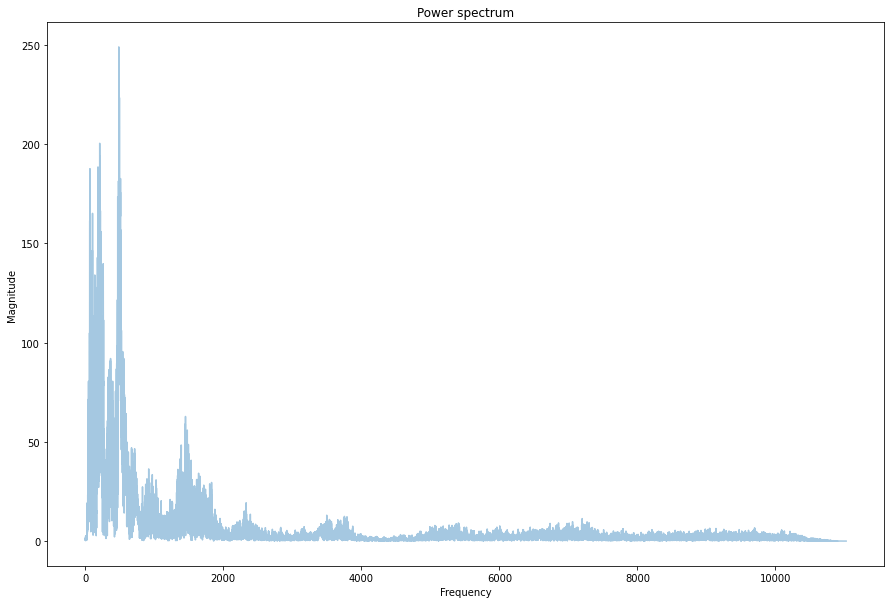

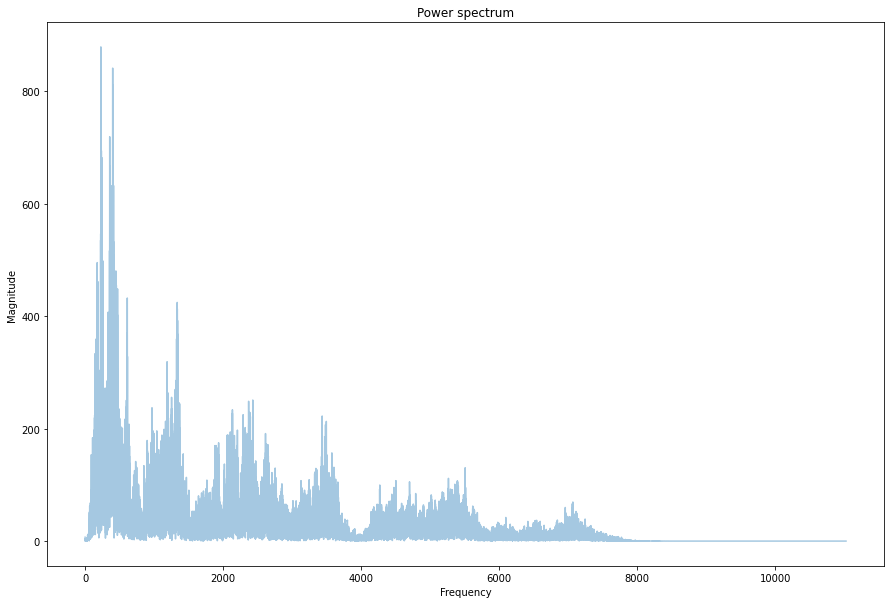

<Figure size 432x288 with 0 Axes>

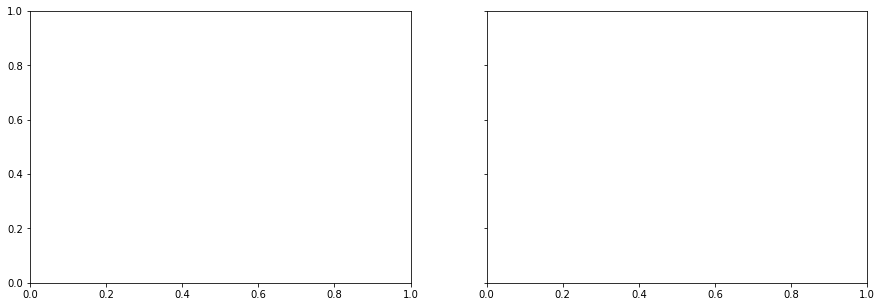

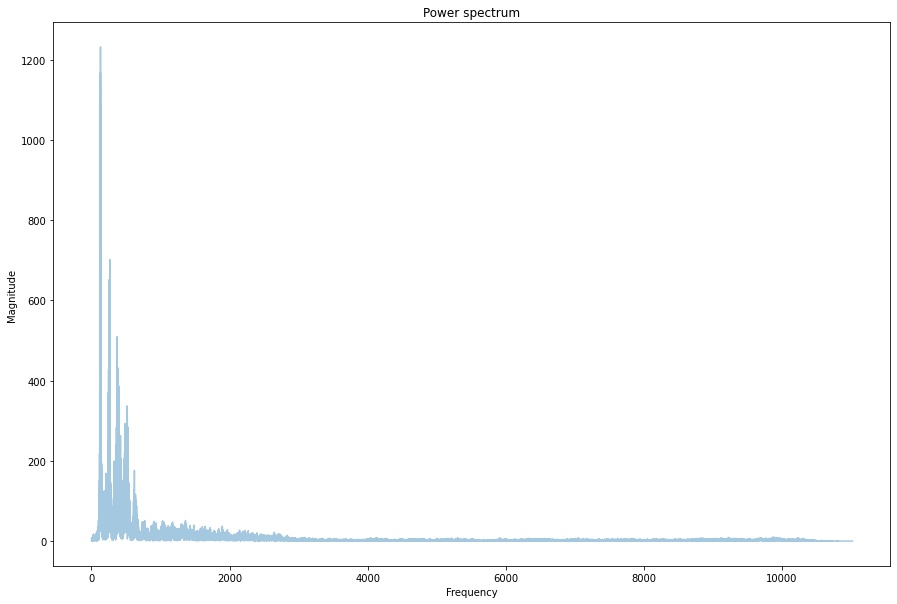

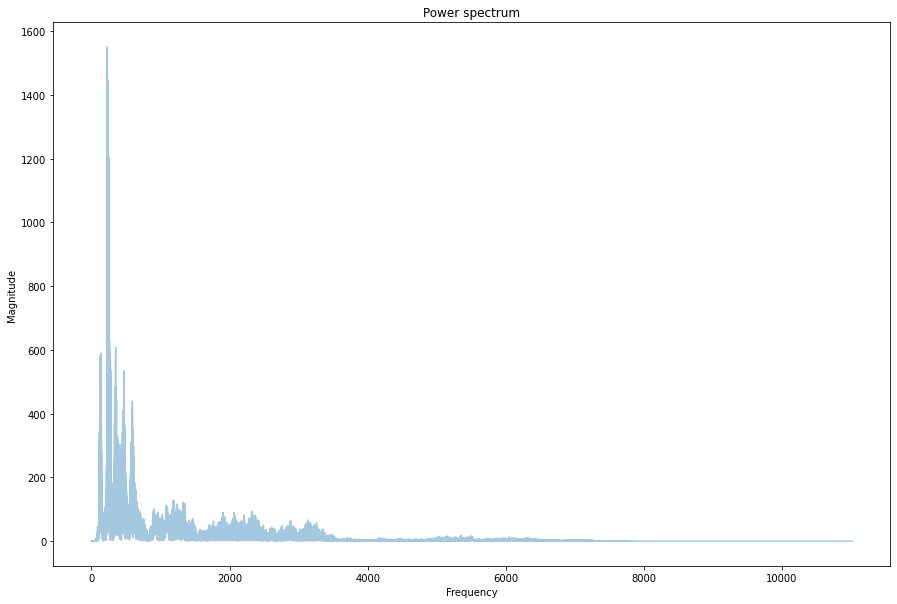

<Figure size 432x288 with 0 Axes>

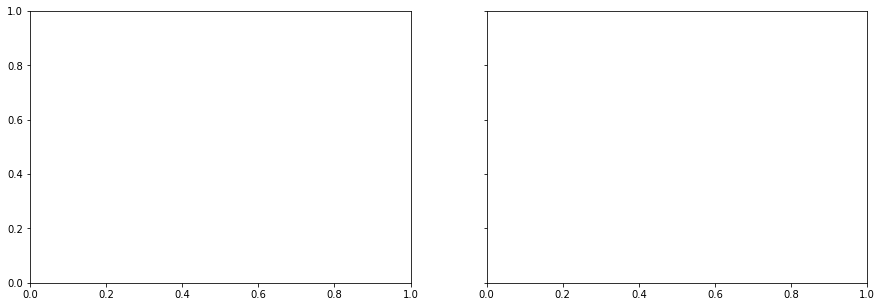

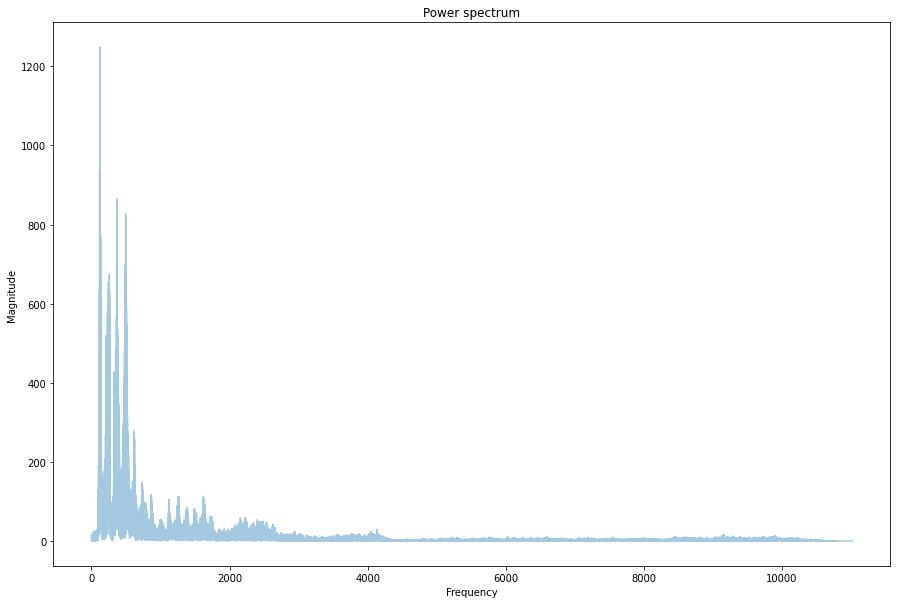

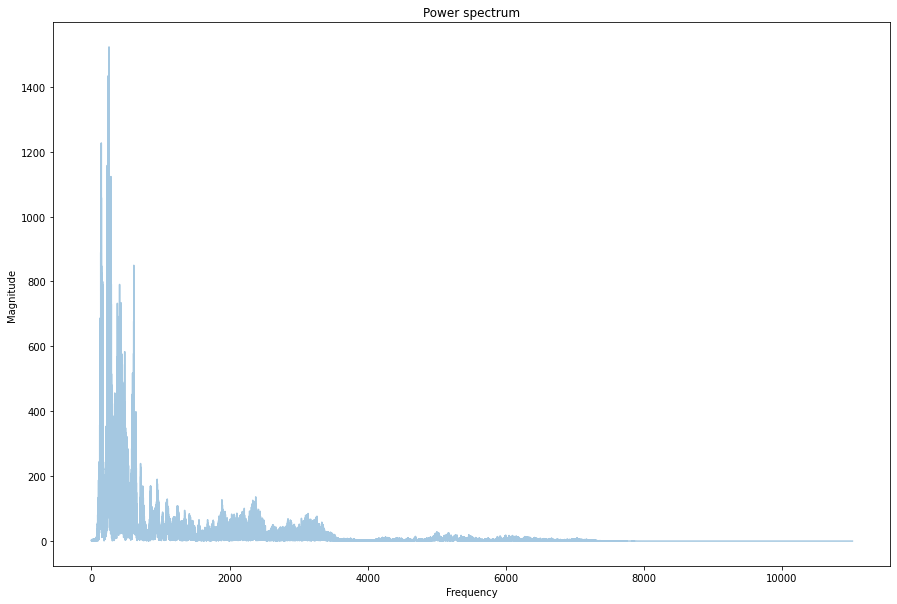

<Figure size 432x288 with 0 Axes>

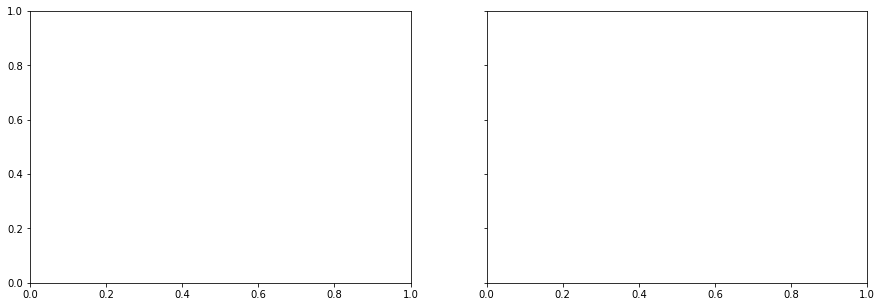

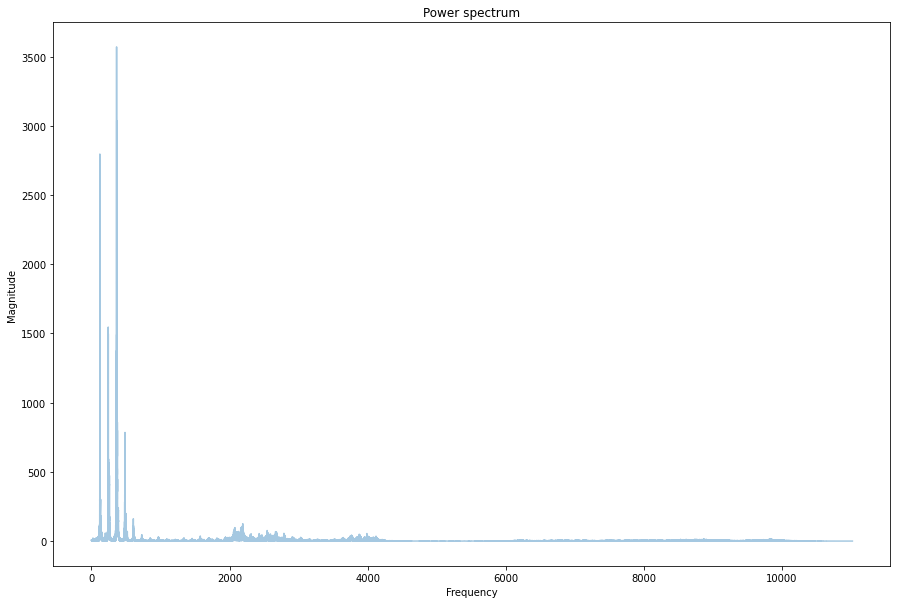

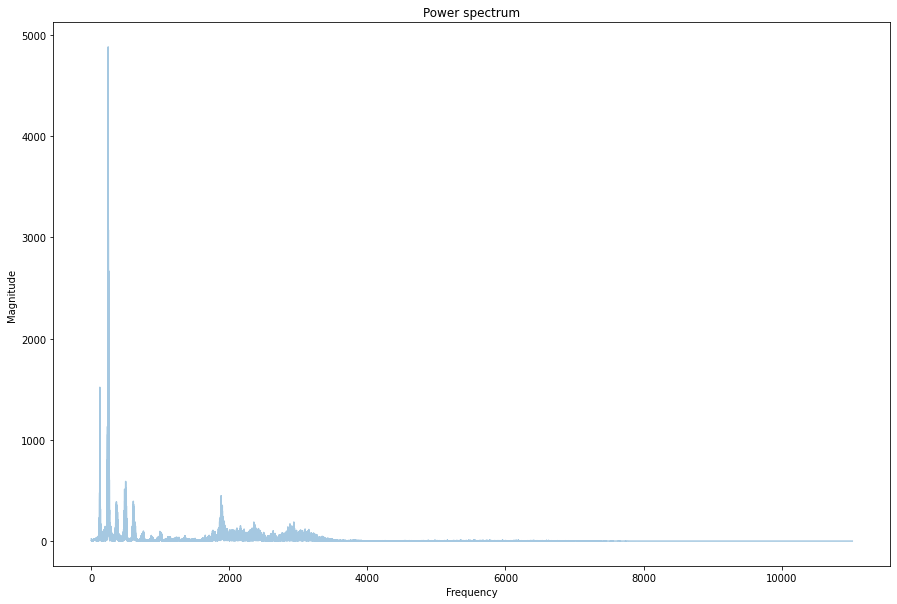

<Figure size 432x288 with 0 Axes>

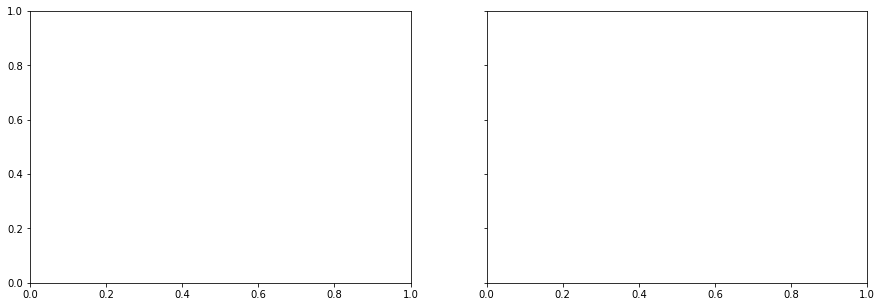

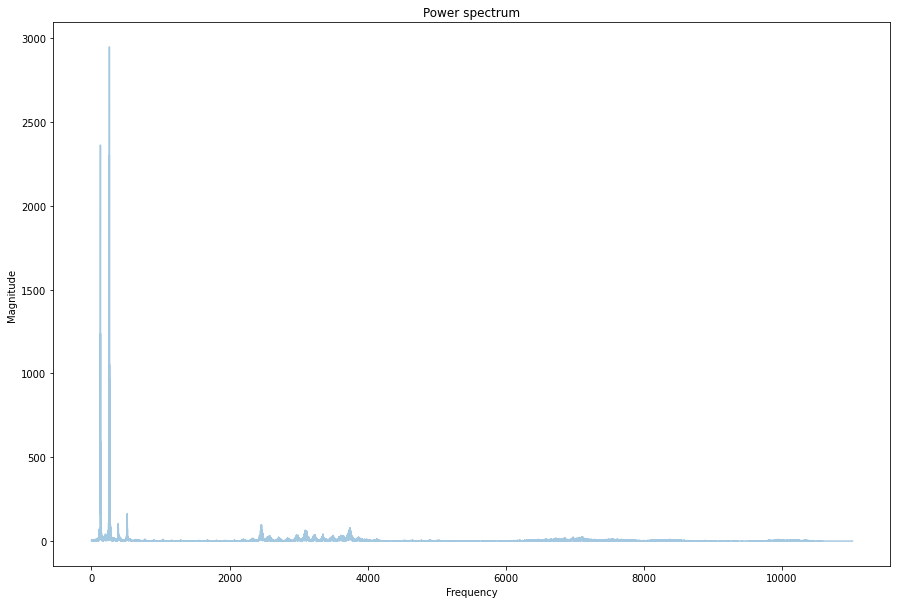

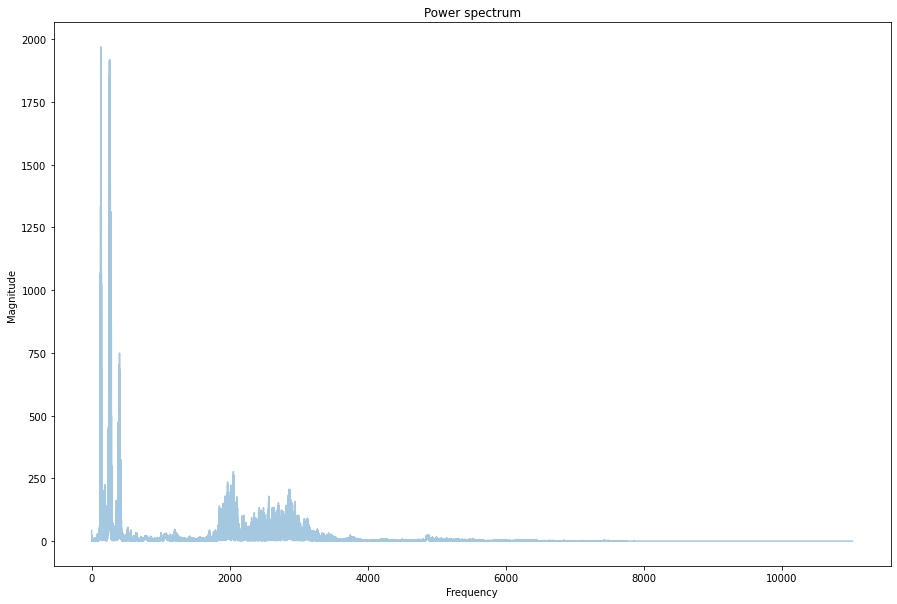

<Figure size 432x288 with 0 Axes>

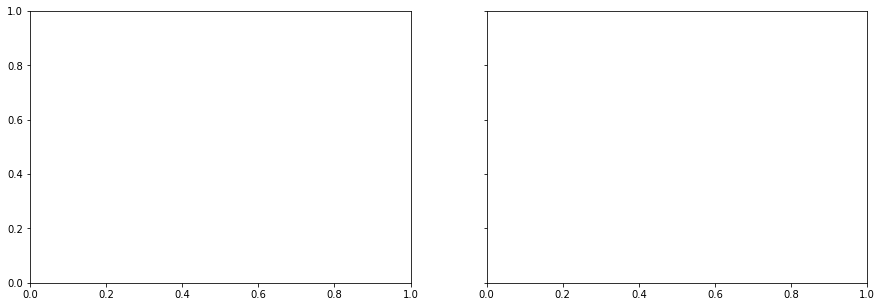

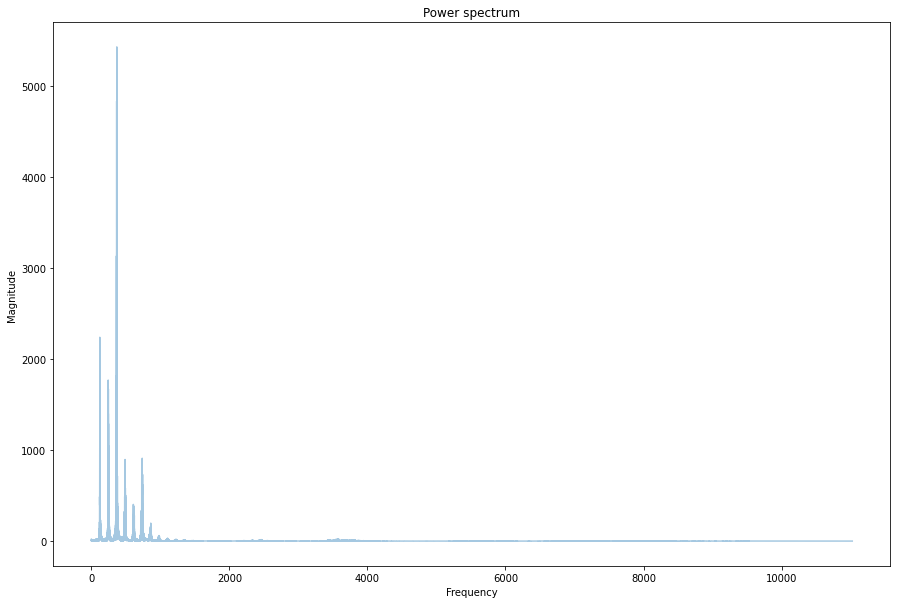

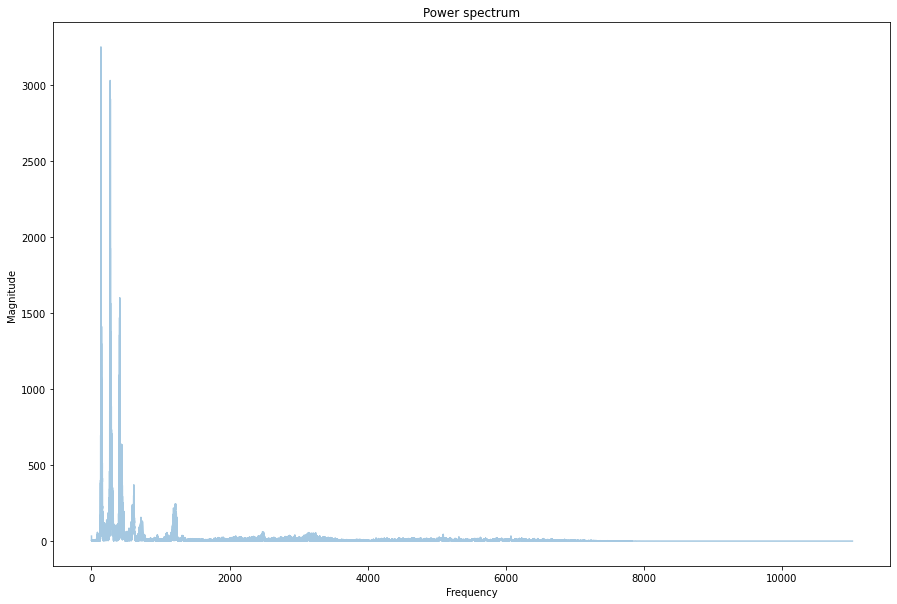

<Figure size 432x288 with 0 Axes>

In [39]:
for tst in resp_test_list:
    plot_spectral_difference(resp_test_type=tst,tgt_0_id=0,tgt_1_id=653)

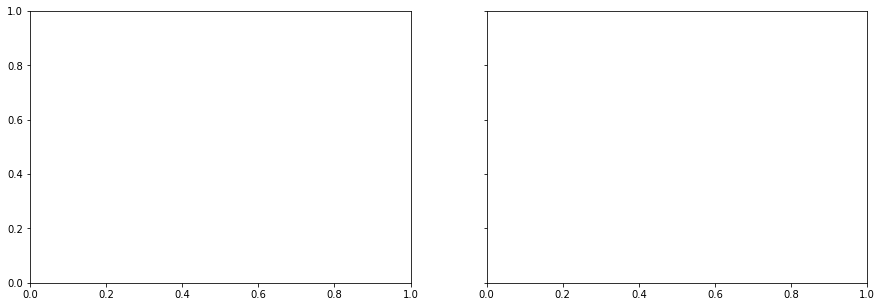

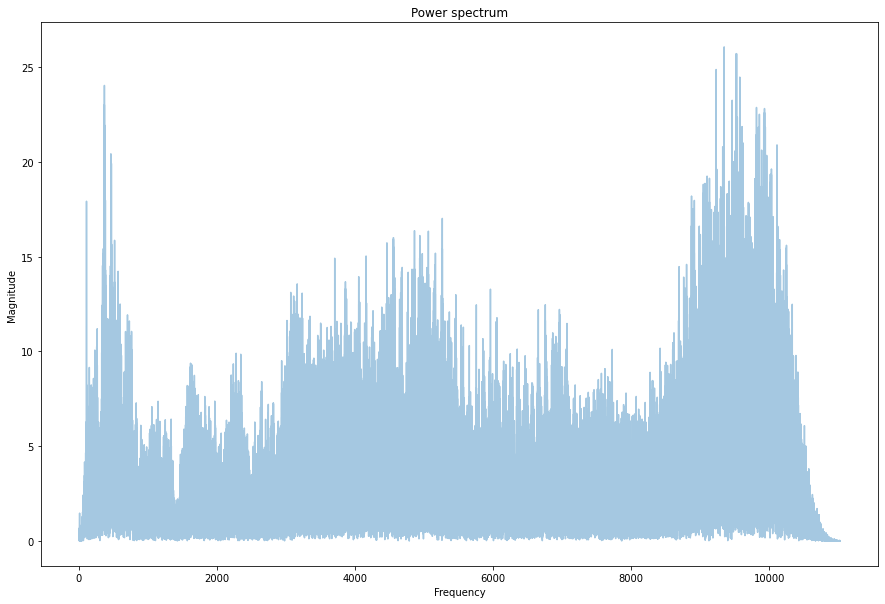

<Figure size 360x360 with 0 Axes>

In [40]:
audio_file = PATH+df[df['COVID_test_status']==0]['breathing-deep'][0]

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))

librosa.display.specshow(get_spectogram(audio_file), y_axis='log', x_axis='time', ax=ax[0])
ax[0].label_outer()

time_series, sample_rate = librosa.load(audio_file)
X = librosa.stft(time_series)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz', ax=ax[1])
    
ax[1].label_outer();
plt.suptitle("", fontsize=14);

# Spectrogram with multiple FFT

In [41]:
PATH+df[df['COVID_test_status']==0]['breathing-deep'][0]
PATH+df[df['COVID_test_status']==1]['breathing-deep'][653]

'/kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset//data/train/20210406/UnJVcWCaLzSZJS8B0YJmDwF9d143/breathing-deep.wav'

In [42]:
def Spectromter_multiple_fft(data_file_path,Test_type):
    test_wav = librosa.core.load(data_file_path, sr=44100)[0]
    fig, ax = plt.subplots(5, 1, figsize=(20,18))
    ax[0].plot(test_wav)
    ax[0].set_title(f"Full "+Test_type+" waveform")

    mel = librosa.feature.melspectrogram(test_wav, sr=44100, n_fft=512, hop_length=256, win_length=512, window='hann', n_mels=100)
    mel[mel < 1e-12] = 1e-12
    ax[1].imshow(np.log(mel)[:,:1000], origin='lower')
    ax[1].set_title(f"Slice of {Test_type} mel spectrogram 512 fft")

    mel = librosa.feature.melspectrogram(test_wav, sr=44100, n_fft=1024, hop_length=256, win_length=1024, window='hann', n_mels=100)
    mel[mel < 1e-12] = 1e-12
    ax[2].imshow(np.log(mel)[:,:1000], origin='lower')
    ax[2].set_title(f"Slice of {Test_type} mel spectrogram 1024 fft")

    mel = librosa.feature.melspectrogram(test_wav, sr=44100, n_fft=2048, hop_length=256, win_length=1024, window='hann', n_mels=100)
    mel[mel < 1e-12] = 1e-12
    ax[3].imshow(np.log(mel)[:,:1000], origin='lower')
    ax[3].set_title(f"Slice of {Test_type} mel spectrogram 2048 fft")
    
    chroma = librosa.feature.chroma_stft(test_wav, sr=44100, n_fft=2048, hop_length=256, win_length=1024, window='hann')
    ax[4].imshow(chroma[:,:1000], origin='lower')
    ax[4].set_title(f"Slice of {Test_type} chromagram 2048 fft")

## Slice of DeepBreath Test Spectrogram on multiple FFT - Non COVID User

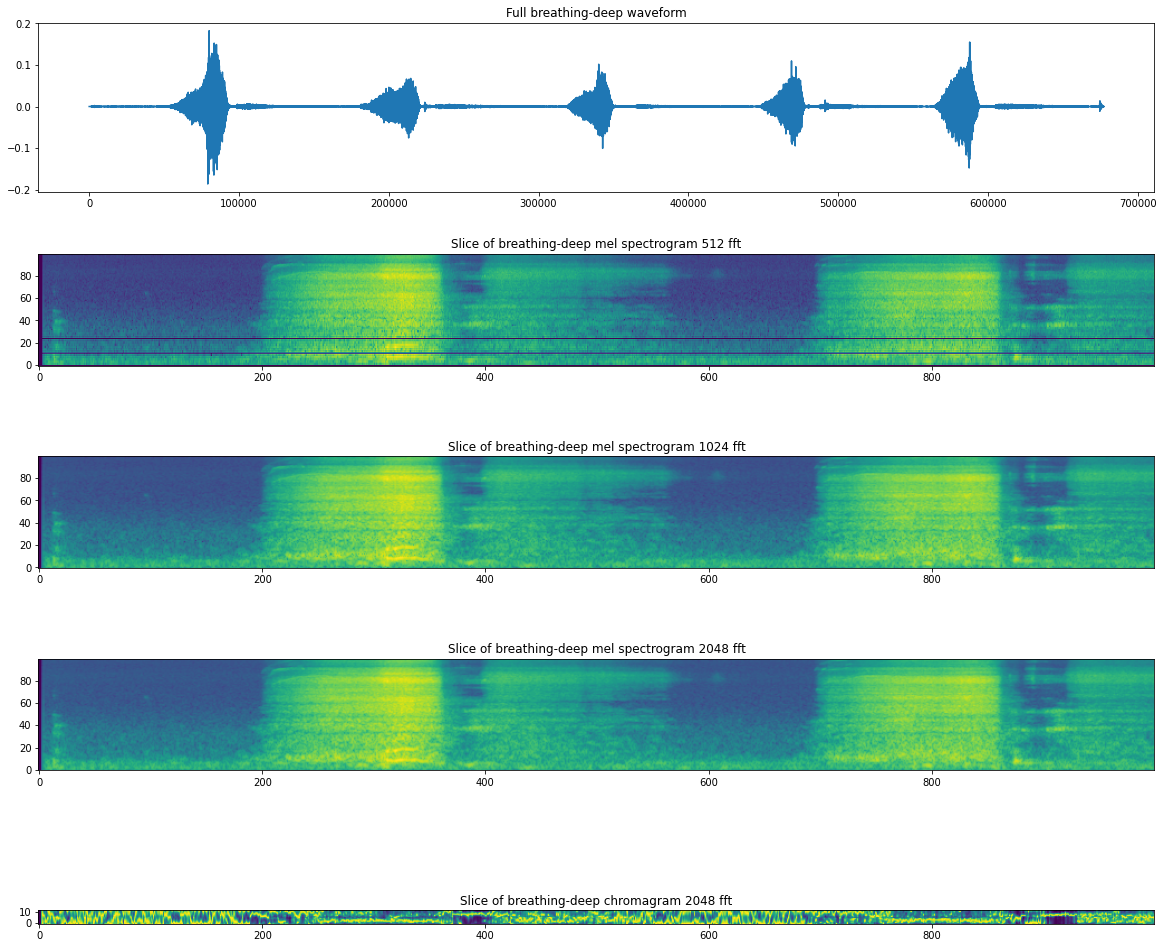

In [43]:
Spectromter_multiple_fft(data_file_path=PATH+df[df['COVID_test_status']==0]['breathing-deep'][0],Test_type='breathing-deep')

## Slice of DeepBreath Test Spectrogram on multiple FFT - COVID Patient

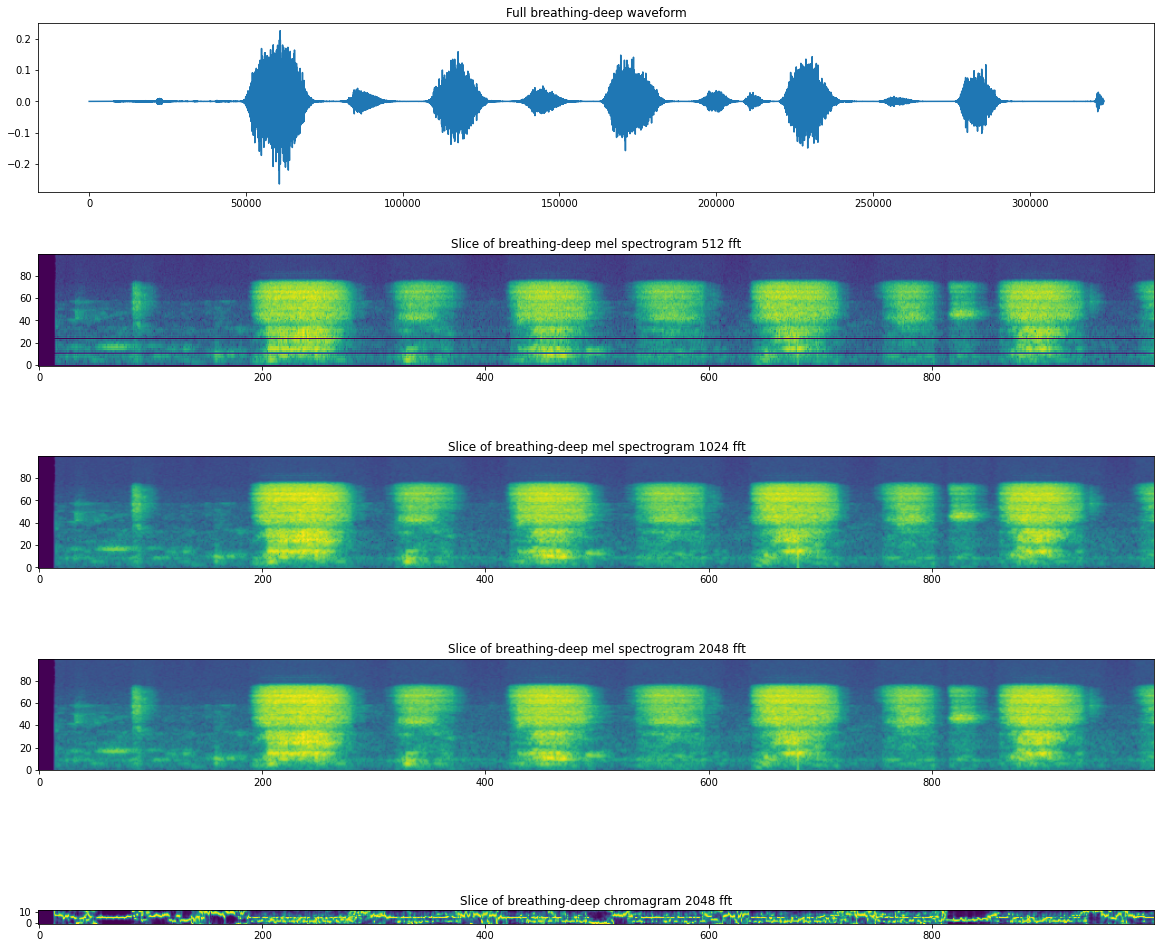

In [44]:
Spectromter_multiple_fft(data_file_path=PATH+df[df['COVID_test_status']==1]['breathing-deep'][653],Test_type='breathing-deep')

# Conclusion :- 

Hope above EDA helps to understand the data in this dataset , Converting Wav files into image files to treat this ML problem as Image Classification problem

Kindly share your thoughts or Comments below

# Ending note <a id="5"></a>

<font color="red" size=4>This concludes my kernel. Please upvote if you like it. It motivates me to produce more quality content :)</font>

In [45]:
import os
import shutil
import pandas as pd

# Create a new DataFrame to store details
new_df = pd.DataFrame(columns=['USER_ID', 'COUNTRY', 'AGE', 'COVID_STATUS', 'COVID_test_status', 'Asthma', 'Pneumonia', 'Audio_File'])

def save_wav_files(resp_test_type, condition):
    # Create a directory to save the .wav files
    output_dir = './new_saved_wav_files/'
    os.makedirs(output_dir, exist_ok=True)
    
    # Get the DataFrame for the specific condition (Asthma or Pneumonia)
    condition_df = df[(df[condition] == 1)]
    
    for index, row in condition_df.iterrows():
        audio_file_path = PATH + row[resp_test_type]
        file_name = f"{condition}_{resp_test_type}_{row['USER_ID']}.wav"
        output_file_path = os.path.join(output_dir, file_name)
        
        # Copy the audio file to the output directory
        shutil.copy(audio_file_path, output_file_path)
        
        # Append details to the new DataFrame
        new_df.loc[len(new_df)] = [row['USER_ID'], row['COUNTRY'], row['AGE'], row['COVID_STATUS'], row['COVID_test_status'], row['Asthma'], row['Pneumonia'], output_file_path]

# Usage
resp_test_type = ['breathing-deep','breathing-shallow']

# Save 'breathing-deep' .wav files for patients with 'Asthma'==1 or 'Pneumonia'==1
for i in resp_test_type:
    save_wav_files(i, condition='COVID_test_status')

# Save the new DataFrame to a CSV file
new_df.to_csv('new_patient_audio_details.csv', index=False)


In [46]:
import shutil

# Path to the output directory you want to zip
output_directory = '/kaggle/working/new_saved_wav_files'

# Path to the ZIP file you want to create
zip_file = '/kaggle/working/new_saved_wav_files.zip'

# Create a ZIP archive from the output directory
shutil.make_archive(zip_file, 'zip', output_directory)

'/kaggle/working/new_saved_wav_files.zip.zip'